### INSTRUCTIONS
###### Situation:

Have you ever hopped on a scooter and realized the battery is dead? 😣 What an upsetting experience! 

In order to prevent that horrible user experience from happening, the data science team is focusing its efforts on coming up with the best scooter charging strategy. 

You can find a data set below with scooters’ current geolocation and power level. Power level ranges from 0 - 5 (0 as completely out of battery, 5 as fully charged). It takes 5 hours to charge a scooter’s power from 0 to 5. TechPointX talent team also has a mega charging bus that drives around to pick up scooters and charge them inside. Unfortunately, the bus can only park and start at location 20.19 (xcoordinate), 20.19 (ycoordinate) and only travel 50 miles per hour. 

###### Your Task:

Review the data set, and draw any conclusions you can find from the data set. Try to identify the most popular scooter location, demonstrate your findings using data visualization tools, calculate operation time cost (Operation Time Cost: How long it takes to fully charge all the scooters), and come up with the most efficient scooter charging strategy. 

***************************

### Getting Started:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
scooters_info = pd.read_csv('2019-XTern- Work Sample Assessment Data Science-DS.csv')
scooters_info.head(5)

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4


Text(0.5, 1.0, 'Scooters Location Distribution')

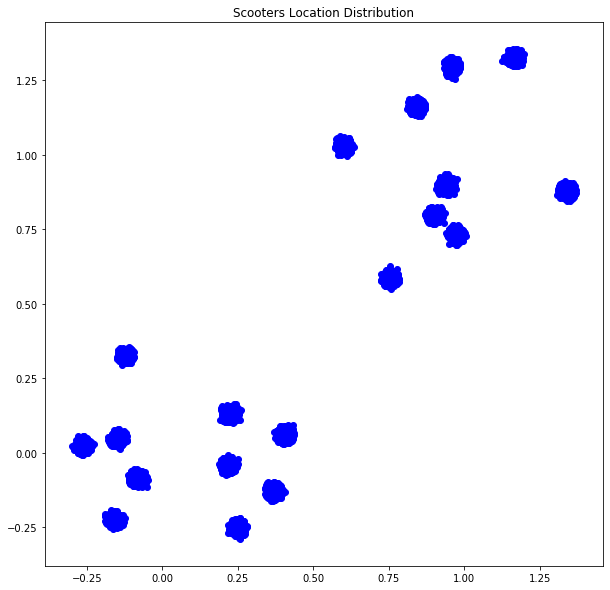

In [3]:
#A quick look at the distribution of the scooters:
plt.figure(figsize = (10, 10))

plt.scatter(scooters_info['xcoordinate'], scooters_info['ycoordinate'], color = 'blue')

plt.title("Scooters Location Distribution")

### Identify the most popular location:

In [4]:
def get_density_avg_power(xmin, xmax, ymin, ymax):
    #return the number of scooters in the specified area of xcoordinates & ycoordinates
    #return the average power level in the specified area of xcoordinates & ycoordinates

    scooters_in_the_area = scooters_info.loc[(scooters_info.xcoordinate > xmin) & (scooters_info.xcoordinate < xmax) & 
                                             (scooters_info.ycoordinate > ymin) & (scooters_info.ycoordinate < ymax)]
    
    return len(scooters_in_the_area.index), scooters_in_the_area.power_level.mean()

In [5]:
#Each point's density is the number of points (scooters) within its radius 

radius = 0.05 #radius of the clusters (see graph below)

scooters_info['density_and_avg_power_lv'] = scooters_info.apply(lambda row: get_density_avg_power(
                                                                            xmin = row['xcoordinate'] - radius, 
                                                                            xmax = row['xcoordinate'] + radius, 
                                                                            ymin = row['ycoordinate'] - radius, 
                                                                            ymax = row['ycoordinate'] + radius), axis = 1)
#this takes about a minute and a half

scooters_info.head()

,scooter_id,xcoordinate,ycoordinate,power_level,density_and_avg_power_lv
0,0,0.906835,0.776484,0,"(1371, 2.453683442742524)"
1,1,0.928587,0.804964,2,"(1314, 2.454337899543379)"
2,2,0.904091,0.784043,1,"(1335, 2.4569288389513106)"
3,3,0.906752,0.804461,0,"(1314, 2.4596651445966513)"
4,4,0.900641,0.781683,4,"(1323, 2.4588057445200304)"


In [6]:
#split the column 'density_and_avg_power_lv' into 2 columns 'density' and 'avg_power_lv':
scooters_info['density'] = scooters_info.apply(lambda row: row.density_and_avg_power_lv[0], axis = 1)
scooters_info['avg_power_lv'] = scooters_info.apply(lambda row: row.density_and_avg_power_lv[1], axis = 1)

#remove the column 'density_and_avg_power_lv' after splitting:
scooters_info.drop('density_and_avg_power_lv', axis = 1, inplace = True)

scooters_info.head()

,scooter_id,xcoordinate,ycoordinate,power_level,density,avg_power_lv
0,0,0.906835,0.776484,0,1371,2.453683
1,1,0.928587,0.804964,2,1314,2.454338
2,2,0.904091,0.784043,1,1335,2.456929
3,3,0.906752,0.804461,0,1314,2.459665
4,4,0.900641,0.781683,4,1323,2.458806


In [7]:
highest_density = scooters_info.iloc[scooters_info.density.idxmax()] #most popular place 
highest_density

scooter_id      1070.000000
xcoordinate        0.932272
ycoordinate        0.772558
power_level        4.000000
density         2357.000000
avg_power_lv       2.490454
Name: 1070, dtype: float64

Text(0.5, 1.0, 'Most Popular Location')

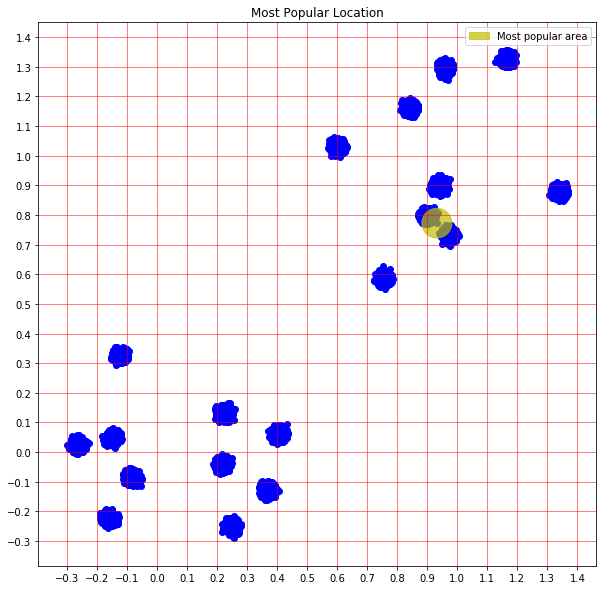

In [8]:
plt.figure(figsize = (10, 10))

axis_scale = np.round(np.linspace(-0.4, 1.4, 19), 1) 
#create an axis scale that starts at -0.4, ends at 1.4, the step is 0.1 >> there're 19 ticks 

plt.xticks(axis_scale)
plt.yticks(axis_scale)

plt.scatter(scooters_info['xcoordinate'], scooters_info['ycoordinate'], color = 'blue')

plt.grid(linewidth = 0.5, color = 'r')

#

highest_density_area = plt.Circle((highest_density.xcoordinate, highest_density.ycoordinate), 
                                  radius=0.05, alpha = 0.7, color = 'y')
plt.gca().add_patch(highest_density_area)
plt.legend(['Most popular area'])

#

plt.title("Most Popular Location")

### Calculate operation time cost:

In [9]:
MAX_CHARGING_TIME = 5

scooters_info['charging_time'] = MAX_CHARGING_TIME - scooters_info['power_level']
#assume that it takes one hour of charging to increase the power level by 1

scooters_info.head(5)

,scooter_id,xcoordinate,ycoordinate,power_level,density,avg_power_lv,charging_time
0,0,0.906835,0.776484,0,1371,2.453683,5
1,1,0.928587,0.804964,2,1314,2.454338,3
2,2,0.904091,0.784043,1,1335,2.456929,4
3,3,0.906752,0.804461,0,1314,2.459665,5
4,4,0.900641,0.781683,4,1323,2.458806,1


In [10]:
operation_time_cost = scooters_info.charging_time.sum() #total charging time of all scooters
operation_time_cost

64271

In [11]:
scooters_info.to_csv("scooters_with_density.csv", index = False)
#export the data to a csv to avoid calculating density again and again